In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import StratifiedShuffleSplit
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 99

In [ ]:
df = pd.read_csv('Data in Table S4 of the Supporting Information.csv')

In [3]:
print(df.shape)
df.head()

(111, 17)


,atom_N,atom_wight,chemi_pot,In_e,out_e,neg(Nm),i_en(Im),aff,radii,C1,C2,N1,N2,N3,H1,H2,Eform
0,40,91.224,-8.547,36,4,1.33,640.1,41.1,206,1,0,0,0,0,0,0,22.384
1,40,91.224,-8.547,36,4,1.33,640.1,41.1,206,0,1,0,0,0,0,0,6.431
2,40,91.224,-8.547,36,4,1.33,640.1,41.1,206,0,0,1,0,0,0,0,9.187
3,40,91.224,-8.547,36,4,1.33,640.1,41.1,206,0,0,0,1,0,0,0,1.181
4,40,91.224,-8.547,36,4,1.33,640.1,41.1,206,0,0,0,0,1,0,0,8.817


In [4]:
data = df.values

X = data[:, :16]
Y = data[:, 16]
first_feature = data[:, 0]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=RANDOM_STATE)

train_index, test_index = next(sss.split(X, first_feature))

x_train, x_test = X[train_index], X[test_index]
y_train, y_test = Y[train_index], Y[test_index]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train_df = pd.DataFrame(x_train)
y_train_df = pd.DataFrame(y_train)
x_train_df.head()

(88, 16)
(23, 16)
(88,)
(23,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,46.0,106.420,-5.177,36.0,10.0,2.20,804.4,53.7,169.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29.0,63.546,-3.716,18.0,11.0,1.90,745.5,118.4,145.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,26.0,55.845,-8.308,18.0,8.0,1.83,762.5,15.7,156.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,22.0,47.867,-7.712,18.0,4.0,1.54,658.8,7.6,176.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.0,15.999,-4.485,2.0,6.0,3.44,1313.9,141.0,48.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


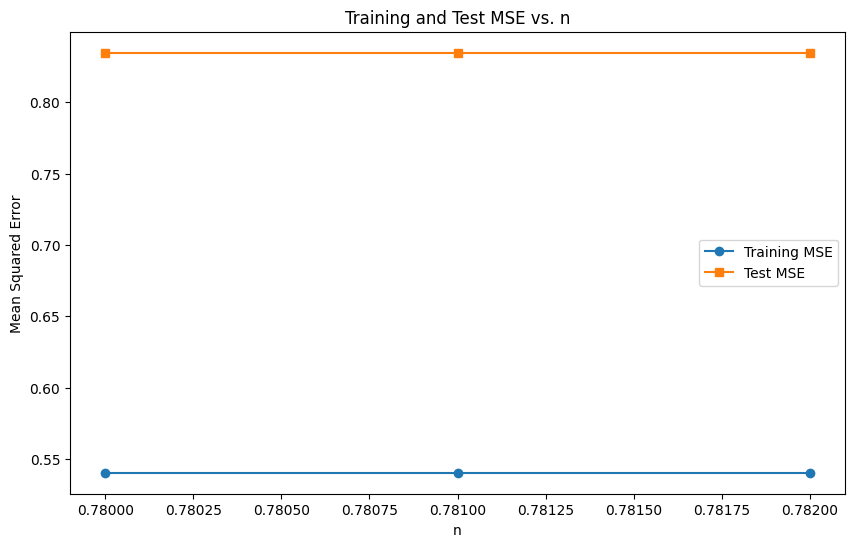

       feature  importance
8        radii    0.337198
14          H1    0.165328
15          H2    0.130375
13          N3    0.080148
12          N2    0.071155
4        out_e    0.045203
9           C1    0.039162
7          aff    0.035478
2    chemi_pot    0.025548
0       atom_N    0.019607
11          N1    0.018601
10          C2    0.017022
5      neg(Nm)    0.010205
6     i_en(Im)    0.004970
1   atom_wight    0.000000
3         In_e    0.000000


In [5]:
n_range = np.arange(0.78, 0.782, 0.001)
train_mse_scores = []
test_mse_scores = []

for n in n_range:
    model = XGBRegressor(
        n_estimators=10,
        learning_rate=0.781,
        verbosity=1,
        random_state=RANDOM_STATE,
        reg_alpha=2,
        reg_lambda=1,
        max_depth=5,
        min_child_weight=None,
        gamma=None
    )
    model.fit(x_train, y_train)
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

plt.figure(figsize=(10, 6))
plt.plot(n_range, train_mse_scores, marker='o', label='Training MSE')
plt.plot(n_range, test_mse_scores, marker='s', label='Test MSE')
plt.xlabel('n')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test MSE vs. n')
plt.legend()
plt.show()

importances = model.feature_importances_

feature_names = df.columns[:16]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

In [6]:
print(
    f"Metrics train:\n"
    f"\t MSR: {mean_squared_error(y_train, train_predictions):.4f} \n"
    f"\t MAR: {mean_absolute_error(y_train, train_predictions):.4f} \n"
    f"\t R2: {r2_score(y_train, train_predictions):.4f}"
)

print(
    f"Metrics test:\n"
    f"\t MSR: {mean_squared_error(y_test, test_predictions):.4f} \n"
    f"\t MAR: {mean_absolute_error(y_test, test_predictions):.4f} \n"
    f"\t R2: {r2_score(y_test, test_predictions):.4f}"
)

Metrics train:
	 MSR: 0.5403 
	 MAR: 0.5218 
	 R2: 0.9664
Metrics test:
	 MSR: 0.8348 
	 MAR: 0.7354 
	 R2: 0.9120


[-1.687  2.36   5.298  9.187  1.673 -1.463 -0.32   6.215  3.216  0.345
  1.052 -0.287  4.95   7.319  1.202  3.803 -0.795  6.958  2.805  3.217
  7.234 -0.22   0.936]
[-1.7738403   1.9523518   3.79115     7.135417    0.8592799  -0.35578686
  0.11242279  5.288751    2.2215745  -0.6242589   1.1287668   0.32257962
  5.6355453   6.0311975   1.2135463   3.6945696  -0.6949639   7.8598003
  1.4239292   3.5850258   5.8241115   0.3243477   1.0697032 ]
[ 6.7140e+00 -9.4000e-02  4.8690e+00  9.3140e+00  4.5460e+00  1.2410e+00
 -2.7500e-01  3.0280e+00  6.4380e+00 -1.3000e-02  8.0500e-01  2.7560e+00
  2.9920e+00 -2.1180e+00  3.5290e+00 -7.8000e-02  1.4386e+01 -4.0700e+00
 -2.7000e-02  1.5430e+00  7.6270e+00  6.6710e+00  1.5300e+00  4.8050e+00
  6.9520e+00 -5.4100e-01  6.4310e+00  5.2040e+00 -8.9000e-02  6.9400e+00
  7.0700e+00  4.5850e+00  3.9180e+00  4.8350e+00  1.0763e+01  8.5340e+00
  1.2340e+00  8.2300e-01  6.7370e+00  1.2910e+00  9.9500e-01  1.1860e+00
  3.0370e+00  3.1700e-01 -1.0400e+00  5.8110

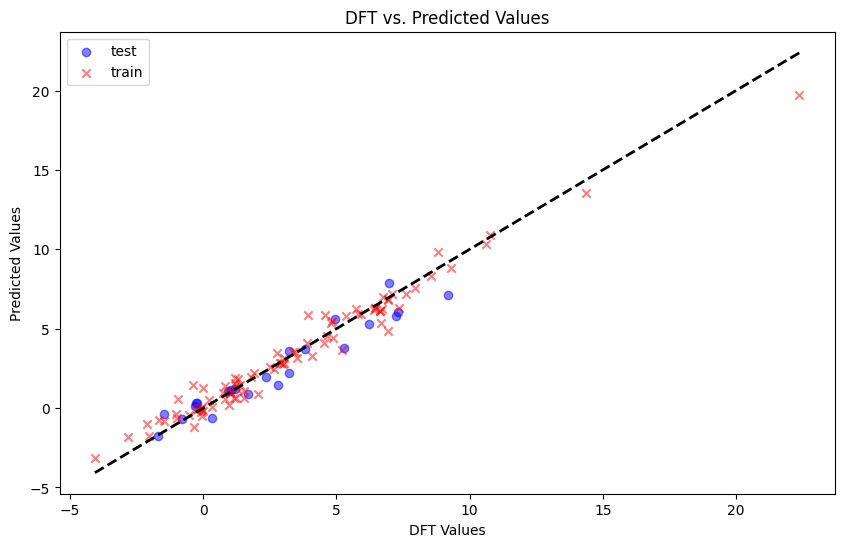

In [7]:
print(y_test)
y_predict_test = model.predict(x_test)
print(y_predict_test)

print(y_train)
y_predict_train = model.predict(x_train)
print(y_predict_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_test, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, y_predict_train, alpha=0.5, color='red', label='train', marker='x')

plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

In [8]:

new_data = pd.read_csv('formation_enenrgy_data - Copy - pre.csv')

new_data_predictions = model.predict(new_data)

print("Predictions for new data:")
print(new_data_predictions)


Predictions for new data:
[ 0.6613191  -1.5323223   3.5271382   4.341534    3.4074714   1.1104321
  5.9455066  -0.7023573   3.1420255   2.567102    6.297503    4.3059807
 12.807279    2.4865825   1.0982782   5.973839    5.186167    1.7306522
  0.03674199  6.010528   -0.40363118  5.8495464   1.135858   -0.32913324
  2.2010434   5.092283    0.56291926 -1.0539197   1.4961462 ]
